In [35]:
## 加载包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib import offsetbox
## 图像在jupyter notebook中显示
%matplotlib inline
## 显示的图片格式（mac中的高清格式），还可以设置为"bmp"等格式
%config InlineBackend.figure_format = "retina"
## 输出图显示中文
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)

In [2]:
from sklearn.decomposition import PCA
import scipy.io as sio   ## 用来读取mat文件

In [88]:
## ARface数据集，100类，每类26个样本，每个图像32*32
face = sio.loadmat("/Users/daitu/慕课/Python机器学习入门/data/AR_face_100classes_26points_per_person_32_32_2600points.mat")
faceA = face["A"].T / 255.0
label = face["labels"]
faceA.shape

(2600, 1024)

In [89]:
faceA = faceA[label[0]<7,:]
faceA

array([[0.1254902 , 0.1372549 , 0.19215686, ..., 1.        , 0.97647059,
        0.89411765],
       [0.41960784, 0.10588235, 0.1372549 , ..., 1.        , 1.        ,
        1.        ],
       [0.12156863, 0.12941176, 0.17254902, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.11764706, 0.1254902 , 0.11764706, ..., 0.14901961, 0.18039216,
        0.16862745],
       [0.12941176, 0.1372549 , 0.12156863, ..., 0.31764706, 0.38039216,
        0.38431373],
       [0.16862745, 0.19607843, 0.19215686, ..., 0.17254902, 0.20392157,
        0.21960784]])

In [90]:
pca = PCA(n_components=2)
facepca = pca.fit_transform(faceA)
facepca.shape

(234, 2)

Text(0,0.5,'主成分2')

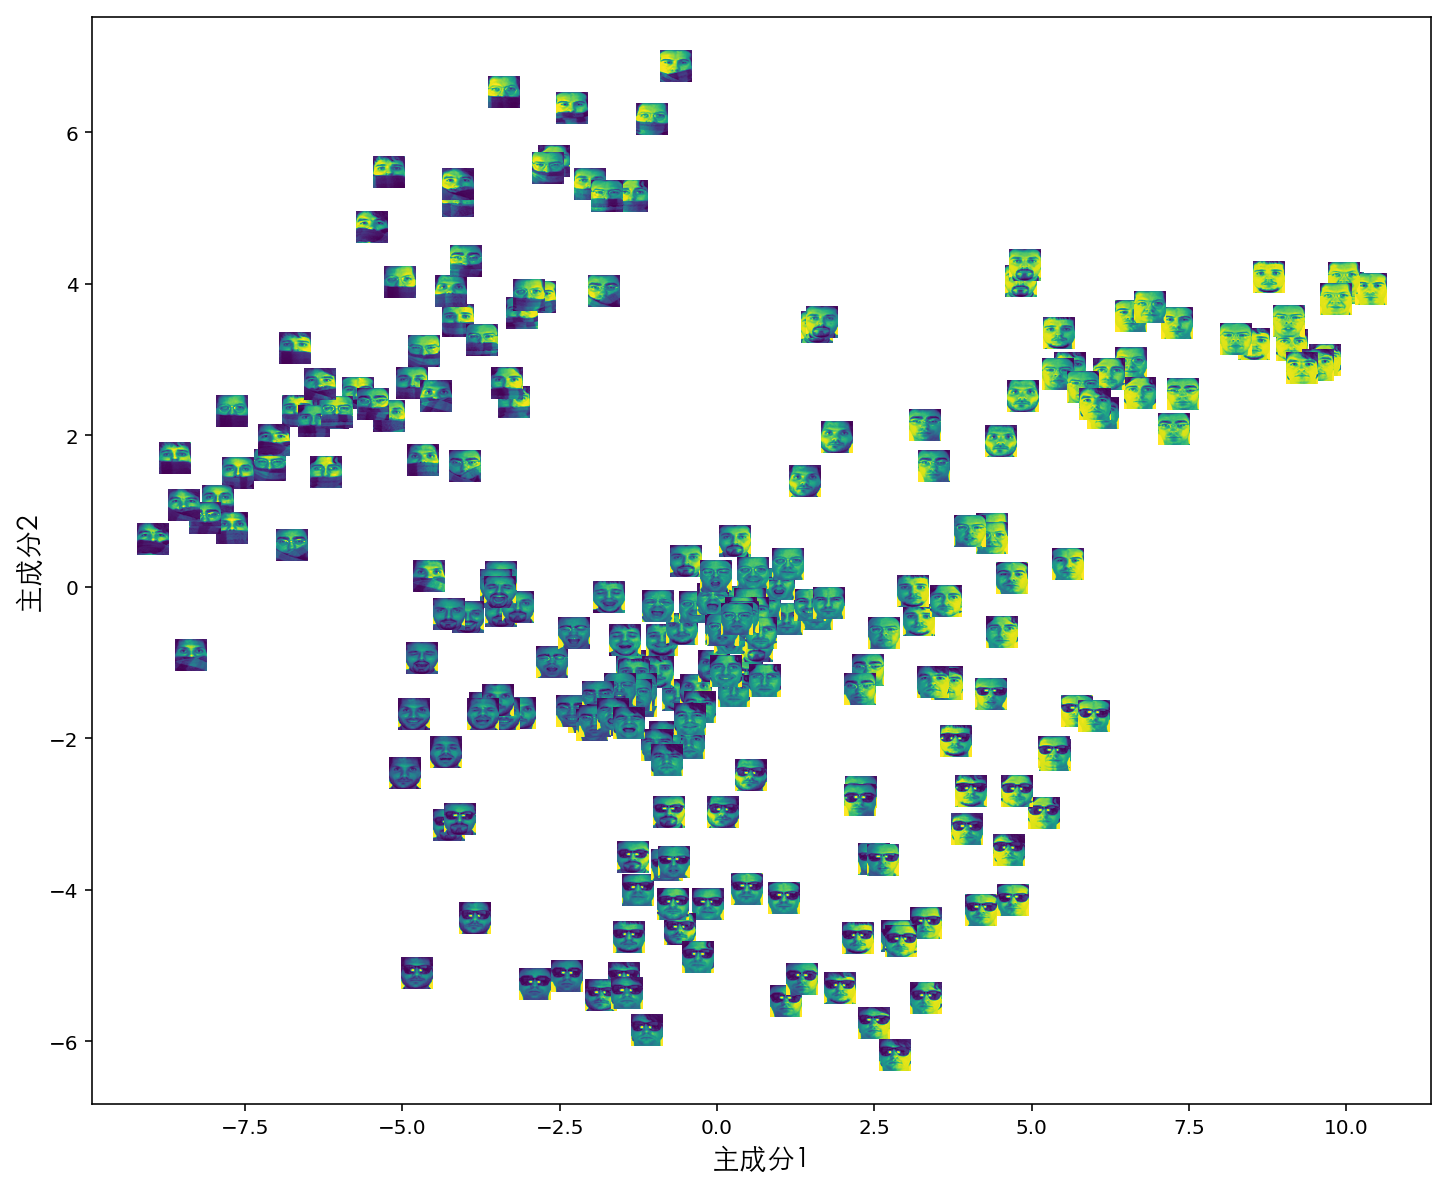

In [92]:
plt.figure(figsize=(12,10))
ax = plt.subplot(111)
x = facepca[:,0]
y = facepca[:,1]
images = []
for i in range(len(x)):
    x0, y0 = x[i], y[i]
    img = np.reshape(faceA[i,:],(32,32),order = "F")
    image = offsetbox.OffsetImage(img, zoom=0.5)
    ab = offsetbox.AnnotationBbox(image, (x0, y0), xycoords='data', frameon=False)
    images.append(ax.add_artist(ab))

ax.update_datalim(np.column_stack([x, y]))
ax.autoscale()
plt.xlabel("主成分1",FontProperties = fonts)
plt.ylabel("主成分2",FontProperties = fonts)

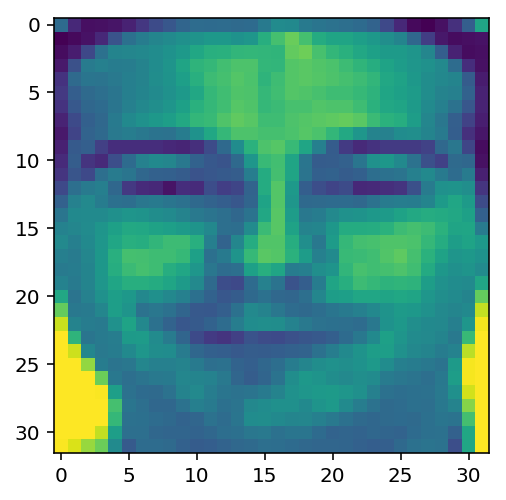

In [33]:
## 可视化降维后的图像
im = np.reshape(faceA[1,:],(32,32),order = "F")
plt.imshow(im)

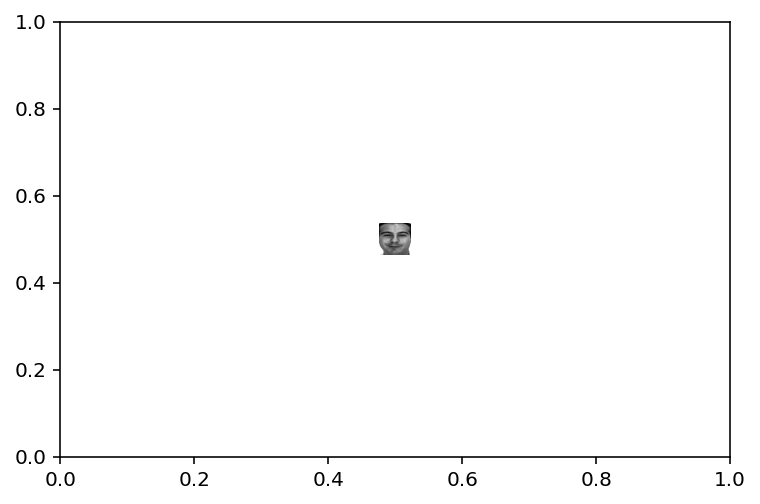

In [66]:
plt.figure()
ax = plt.subplot(111)
arr = np.reshape(faceA[1,:],(32,32),order = "F")
im = offsetbox.OffsetImage(arr, zoom=0.5, cmap=plt.cm.gray)
im.image.axes = ax
xy = (0.5,0.5)
imagebox = offsetbox.AnnotationBbox(im, (0.5, 0.5),frameon=False)
ax.add_artist(imagebox)
plt.show()